In [1]:
import matplotlib.pyplot as plt
import time
import datetime
import numpy as np
import pandas as pd
import os, sys
import pymysql

plt.rc('font', family='HYsanB')

In [54]:
def getTemp(pole_id):
    sensor = '변압기 본체'
    os.chdir('D:\\dev\\IoT_data\\IoT')
    
    data=pd.read_csv(pole_id+'.csv')

    # temp_data = data[data['time_id'].str.contains(time)]
    temp_data=data.loc[data['part_name']==sensor, ['time_id','temp']]
    temp_data['time_id'] = pd.to_datetime(temp_data['time_id'], format='%Y-%m-%d %H:%M:%S')
    temp_data.set_index(temp_data['time_id'], inplace=True)
    temp_data = temp_data.drop('time_id', 1)
    temp_data.index.names=[None]
    
    return temp_data

In [55]:
pole = '8132W811'
temp=getTemp(pole)

d:\dev\python\python35\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


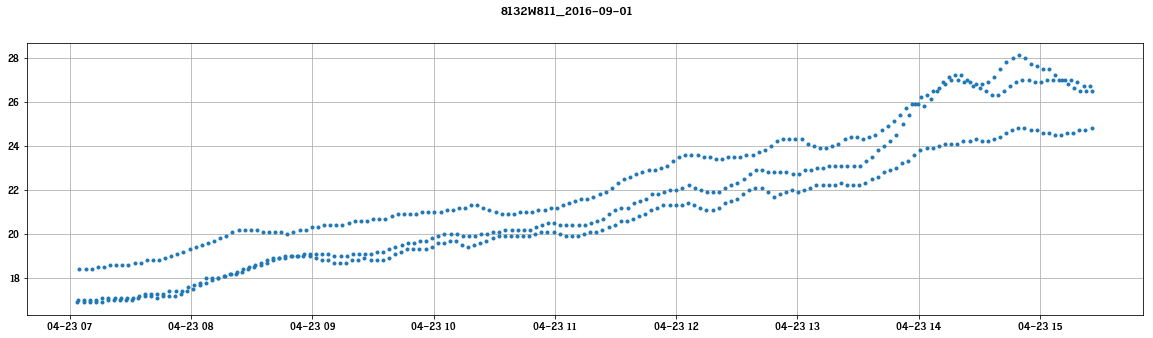

In [56]:
fig = plt.figure(figsize=(20,5))
fig.suptitle(pole + '_' + time)

ax = fig.add_subplot(111)
ax.plot(temp['temp'][1000:1500],'.')
plt.grid()
plt.show()

d:\dev\python\python35\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


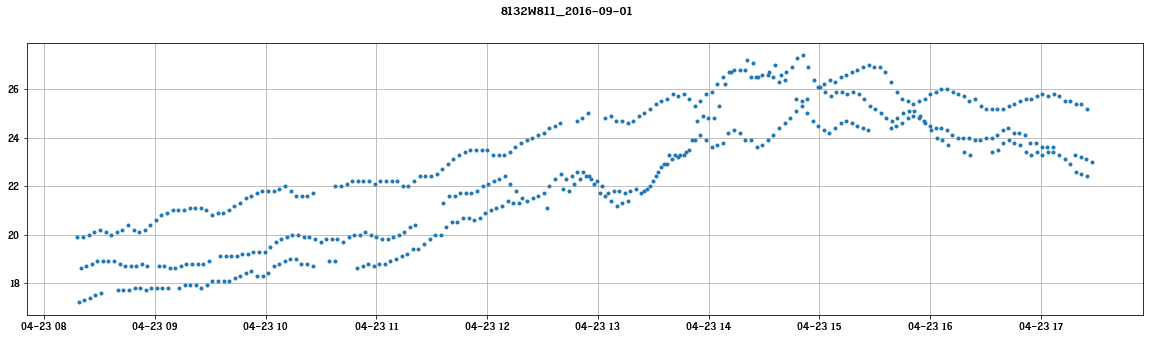

In [81]:
pole2='8132G101'
temp2=getTemp(pole2)
fig = plt.figure(figsize=(20,5))
fig.suptitle(pole + '_' + time)

ax = fig.add_subplot(111)
ax.plot(temp2['temp'][1000:1500],'.')
plt.grid()
plt.show()

In [84]:
temp[1000:1500]

,temp
2016-04-23 07:03:47,16.9
2016-04-23 07:04:05,17.0
2016-04-23 07:04:48,18.4
2016-04-23 07:06:48,16.9
2016-04-23 07:07:06,17.0
2016-04-23 07:07:53,18.4
2016-04-23 07:09:49,16.9
2016-04-23 07:10:06,17.0
2016-04-23 07:10:55,18.4
2016-04-23 07:12:50,16.9


In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import os

os.chdir('D:\\dev\\IoT_data\\IoT_233')
data = pd.read_csv('8132D823.csv')
start = '2016-04-22 16:08:00'
end = '2017-05-15 23:59:59'

pole_data = data[['TIME_ID', 'AMBIENT', 'BATTERY', 'HUMI', 'PITCH', 'ROLL', 'PRESS', 'TEMP', 'UV']]
pole_data['TIME_ID'] = pd.to_datetime(pole_data['TIME_ID'], format='%Y-%m-%d %H:%M:%S')

# data의 주기가 일정하지 않아 초 단위로 time_id 컬럼을 가진 data_time 생성
start_time = pd.to_datetime(start, format='%Y-%m-%d %H:%M:%S')
end_time = pd.to_datetime(end, format='%Y-%m-%d %H:%M:%S')
time_range = pd.date_range(start_time, end_time, freq='s')
data_time = pd.DataFrame(time_range)
data_time.rename(columns={0: 'TIME_ID'}, inplace=True)  # inplace=True: data_time을 직접 변경

# time_id를 기준으로 data_time과 data_sensor merge
data_temp = pd.merge(data_time, pole_data, on='TIME_ID', how='left')
# data_temp['TIME_ID'] = pd.to_datetime(data_temp['TIME_ID'], format='%Y-%m-%d %H:%M:%S')
# # index를 time_id로 지정
# data_temp.set_index(data_temp['TIME_ID'], inplace=True)
# data_temp = data_temp.drop('TIME_ID', 1)
# data_temp.index.names = [None]

print(data_temp)

d:\dev\python\python35\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


                     TIME_ID  AMBIENT  BATTERY  HUMI  PITCH  ROLL   PRESS  \
0        2016-04-22 16:08:00      NaN      NaN   NaN    NaN   NaN     NaN   
1        2016-04-22 16:08:01      NaN      NaN   NaN    NaN   NaN     NaN   
2        2016-04-22 16:08:02      NaN      NaN   NaN    NaN   NaN     NaN   
3        2016-04-22 16:08:03      NaN      NaN   NaN    NaN   NaN     NaN   
4        2016-04-22 16:08:04      NaN      NaN   NaN    NaN   NaN     NaN   
5        2016-04-22 16:08:05      NaN      NaN   NaN    NaN   NaN     NaN   
6        2016-04-22 16:08:06      NaN      NaN   NaN    NaN   NaN     NaN   
7        2016-04-22 16:08:07      NaN      NaN   NaN    NaN   NaN     NaN   
8        2016-04-22 16:08:08      NaN      NaN   NaN    NaN   NaN     NaN   
9        2016-04-22 16:08:09      NaN      NaN   NaN    NaN   NaN     NaN   
10       2016-04-22 16:08:10      NaN      NaN   NaN    NaN   NaN     NaN   
11       2016-04-22 16:08:11      NaN      NaN   NaN    NaN   NaN     NaN   

In [17]:
data_temp['TIME_ID'] = pd.to_datetime(data_temp['TIME_ID'], format='%Y-%m-%d %H:%M:%S')
# index를 time_id로 지정
data_temp.set_index(data_temp['TIME_ID'], inplace=True)
data_temp = data_temp.drop('TIME_ID', 1)
data_temp.index.names = [None]

In [18]:
data_temp

,AMBIENT,BATTERY,HUMI,PITCH,ROLL,PRESS,TEMP,UV
2016-04-22 16:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-22 16:08:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-22 16:08:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-22 16:08:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-22 16:08:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-22 16:08:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-22 16:08:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-22 16:08:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-22 16:08:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-22 16:08:09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def getPole(pole_id):
    data = pd.DataFrame
    os.chdir('D:\\dev\\IoT_data\\IoT_233')
    data = pd.read_csv(pole_id + '.csv')
    start = '2016-04-01 00:00:00'
    end = '2017-05-15 23:59:59'

    pole_data = data[['TIME_ID', 'AMBIENT', 'BATTERY', 'HUMI', 'PITCH', 'ROLL', 'PRESS', 'TEMP', 'UV']]
    pole_data['TIME_ID'] = pd.to_datetime(pole_data['TIME_ID'], format='%Y-%m-%d %H:%M:%S')

    # data의 주기가 일정하지 않아 초 단위로 time_id 컬럼을 가진 data_time 생성
    start_time = pd.to_datetime(start, format='%Y-%m-%d %H:%M:%S')
    end_time = pd.to_datetime(end, format='%Y-%m-%d %H:%M:%S')
    time_range = pd.date_range(start_time, end_time, freq='s')
    data_time = pd.DataFrame(time_range)
    data_time.rename(columns={0: 'TIME_ID'}, inplace=True)  # inplace=True: data_time을 직접 변경

    # time_id를 기준으로 data_time과 data_sensor merge
    data_temp = pd.merge(data_time, pole_data, on='TIME_ID', how='left')
    data_temp['TIME_ID'] = pd.to_datetime(data_temp['TIME_ID'], format='%Y-%m-%d %H:%M:%S')
    # index를 time_id로 지정
    data_temp.set_index(data_temp['TIME_ID'], inplace=True)
    data_temp = data_temp.drop('TIME_ID', 1)
    data_temp.index.names = [None]

    return data_temp


def saveImage(pole_id):
    print(pole_id)
    df = getPole(pole_id)

    fig = plt.figure(figsize=(20, 15))
    fig.suptitle(pole_id)
    ax1 = fig.add_subplot(8, 1, 1)
    ax2 = fig.add_subplot(8, 1, 2)
    ax3 = fig.add_subplot(8, 1, 3)
    ax4 = fig.add_subplot(8, 1, 4)
    ax5 = fig.add_subplot(8, 1, 5)
    ax6 = fig.add_subplot(8, 1, 6)
    ax7 = fig.add_subplot(8, 1, 7)
    ax8 = fig.add_subplot(8, 1, 8)

    ax1.plot(df['AMBIENT'])
    ax2.plot(df['BATTERY'])
    ax3.plot(df['HUMI'])
    ax4.plot(df['TEMP'])
    ax5.plot(df['PITCH'])
    ax6.plot(df['ROLL'])
    ax7.plot(df['UV'])
    ax8.plot(df['PRESS'])

    ax1.set_ylabel('AMBIENT')
    ax2.set_ylabel('BATTERY')
    ax3.set_ylabel('HUMI')
    ax4.set_ylabel('TEMP')
    ax5.set_ylabel('PITCH')
    ax6.set_ylabel('ROLL')
    ax7.set_ylabel('UV')
    ax8.set_ylabel('PRESS')

    plt.grid()
    fig.savefig('D:\\dev\\IoT_data\\parameter8_2\\' + pole_id + '.png', format='png')